In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn

In [55]:
data = pd.read_csv("RT_IOT2022.csv")
data = data.drop("Unnamed: 0", axis=1)
data.describe(), data.columns

(           id.orig_p      id.resp_p  flow_duration   fwd_pkts_tot  \
 count  123117.000000  123117.000000  123117.000000  123117.000000   
 mean    34639.258738    1014.305092       3.809566       2.268826   
 std     19070.620354    5256.371994     130.005408      22.336565   
 min         0.000000       0.000000       0.000000       0.000000   
 25%     17702.000000      21.000000       0.000001       1.000000   
 50%     37221.000000      21.000000       0.000004       1.000000   
 75%     50971.000000      21.000000       0.000005       1.000000   
 max     65535.000000   65389.000000   21728.335578    4345.000000   
 
         bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
 count  123117.000000      123117.000000      123117.000000      1.231170e+05   
 mean        1.909509           1.471218           0.820260      3.518063e+05   
 std        33.018311          19.635196          32.293948      3.707645e+05   
 min         0.000000           0.000000    

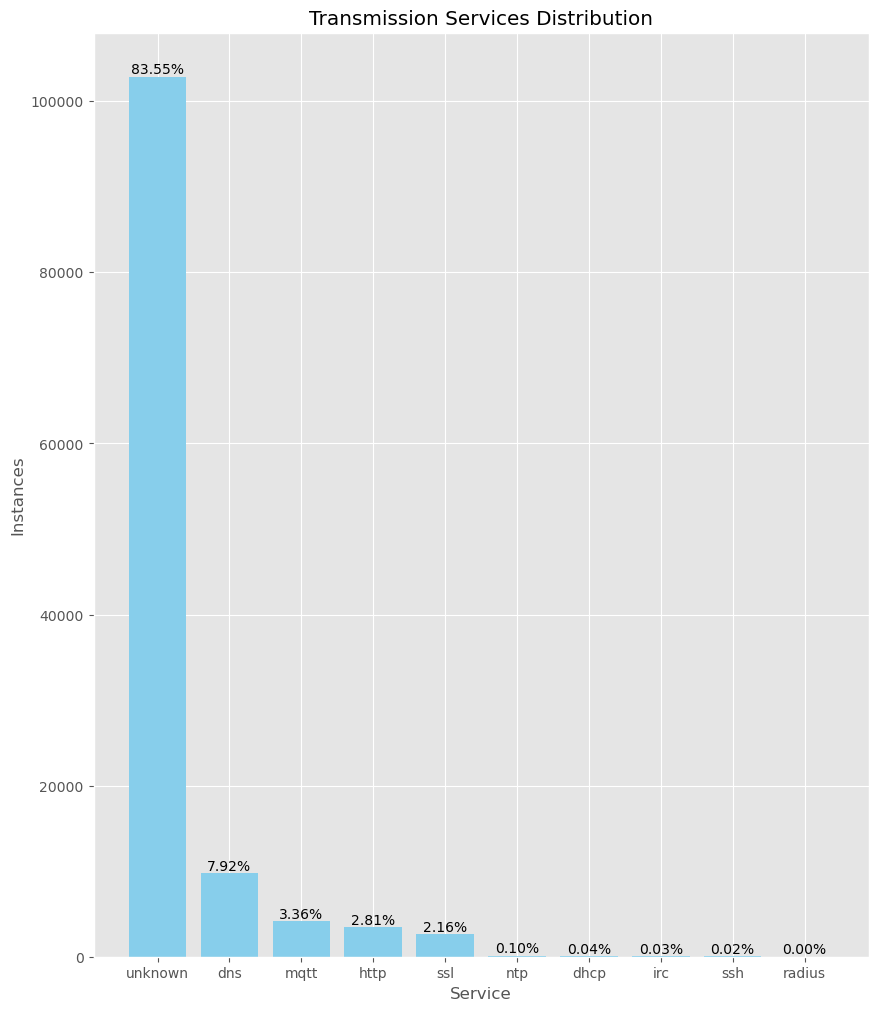

In [80]:
plt.style.use('ggplot')

plt.figure(figsize=[10,12])

index_names = data['service'].value_counts().index.to_list()
index_names[0] = "unknown"

bar_objects = plt.bar(x=index_names, height=data['service'].value_counts().values, color="skyblue")

# Calculate the percentages and create label text
percentages = data['service'].value_counts().values / sum(data['service'].value_counts().values) * 100
labels = [f"{i:.2f}%" for i in percentages]

# Annotate each bar with its respective percentage
for bar, label in zip(bar_objects, labels):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title("Transmission Services Distribution")
plt.xlabel("Service")
plt.ylabel("Instances")
plt.show()

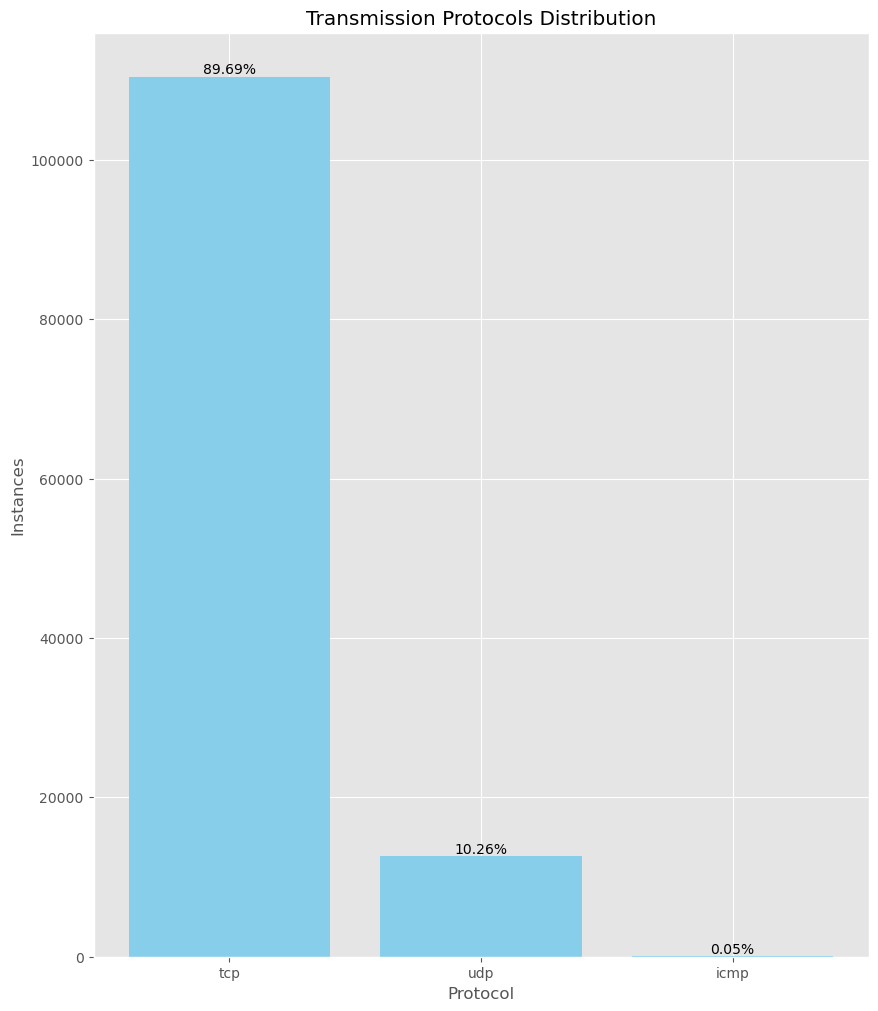

In [76]:
plt.style.use('ggplot')

plt.figure(figsize=[10,12])

bar_objects = plt.bar(x=data['proto'].value_counts().index, height=data['proto'].value_counts().values, color="skyblue")

# Calculate the percentages and create label text
percentages = data['proto'].value_counts().values / sum(data['proto'].value_counts().values) * 100
labels = [f"{i:.2f}%" for i in percentages]

# Annotate each bar with its respective percentage
for bar, label in zip(bar_objects, labels):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title("Transmission Protocols Distribution")
plt.xlabel("Protocol")
plt.ylabel("Instances")
plt.show()

In [124]:
y = data.Attack_type
X = data.loc[:, data.columns != "Attack_type"].select_dtypes(np.number)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [125]:
import time
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
forest = RandomForestClassifier(random_state = 7)
forest.fit(X_train, y_train)
time.time() - start_time

RandomForestClassifier(random_state=7)

In [130]:
train_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)
print("Train accuracy", sklearn.metrics.accuracy_score(train_preds, y_train))
print("Test accuracy", sklearn.metrics.accuracy_score(test_preds, y_test))
print("Sample data")
print("ground truth:", y_test.values[:5])
print("preds:", test_preds[:5])

Train accuracy 0.9998060323925905
Test accuracy 0.9977602205321322
Sample data
ground truth: ['DOS_SYN_Hping' 'DOS_SYN_Hping' 'DOS_SYN_Hping' 'MQTT_Publish'
 'DOS_SYN_Hping']
preds: ['DOS_SYN_Hping' 'DOS_SYN_Hping' 'DOS_SYN_Hping' 'MQTT_Publish'
 'DOS_SYN_Hping']


fwd_pkts_payload.avg    0.089607
fwd_pkts_payload.min    0.080081
id.resp_p               0.071871
fwd_subflow_bytes       0.070235
fwd_pkts_payload.max    0.059362
fwd_pkts_payload.tot    0.034625
flow_iat.avg            0.028822
dtype: float64


<Axes: title={'center': 'Top 20 Feature Importance According to Default Random Forest'}, xlabel='Feature', ylabel='Importance x where 0 < x < 1'>

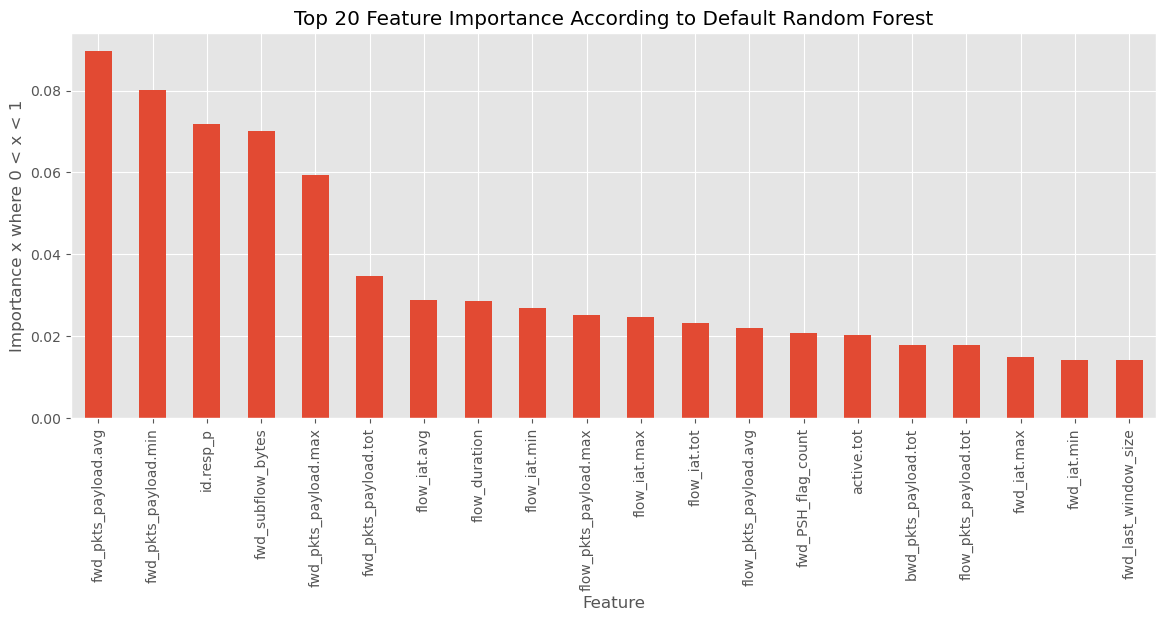

In [118]:
importances = forest.feature_importances_

forest_importances = pd.Series(importances, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)
print(forest_importances[:7])

fig, ax = plt.subplots()
fig.set_figwidth(14)
fig.set_figheight(5)
ax.set_title("Top 20 Feature Importance According to Default Random Forest")
ax.set_ylabel("Importance x where 0 < x < 1")
ax.set_xlabel("Feature")
forest_importances[:20].plot.bar(ax=ax, fig=fig)